Author : Clara Martinez

## Week 5 - Day 3 : NLP

### 2.2 Calcul des paramètres de poids pour les entrées

#### 2.2.1 Initialisation des trois matrices de poids Wq, Wk, Wv

- **Rôle** : Ces matrices de poids sont utilisées pour transformer les vecteurs d'entrée en requêtes (queries), clés (keys) et valeurs (values). Cela permet au modèle d'apprendre des relations complexes entre les entrées.
- **Fonction** : Chaque matrice de poids (Wq, Wk, Wv) est utilisée pour projeter les vecteurs d'entrée dans des espaces différents, mettant en évidence différents aspects de la signification des mots.

#### 2.2.2 Calcul des vecteurs de requête, de clé et de valeur pour les entrées

- **Rôle** : Ces transformations projettent les entrées dans différents « espaces » qui mettent en évidence différents aspects de la signification du mot.
- **Fonction** : Les vecteurs de requête, de clé et de valeur sont calculés en multipliant les vecteurs d'entrée par les matrices de poids respectives (Wq, Wk, Wv).

#### 2.2.3 Calcul du score d'attention pour les entrées

- **Rôle** : Le score d'attention mesure la similarité entre la requête transformée et la clé.
- **Fonction** : Le score d'attention (ω11) est calculé en prenant le produit scalaire de la requête et de la clé, puis en appliquant une fonction d'activation, souvent la fonction softmax.

#### 2.2.4 Calcul de tous les scores d'attention pour les entrées

- **Rôle** : Les scores d'attention sont calculés pour chaque paire de requête et de clé.
- **Fonction** : Cela implique de calculer la similarité entre la requête et chaque clé, ce qui donne un vecteur de scores d'attention.

#### 2.2.5 Poids d'attention pour les entrées

- **Rôle** : Les scores d'attention sont normalisés pour obtenir des poids d'attention.
- **Fonction** : La normalisation est souvent effectuée en utilisant la fonction softmax, qui garantit que les poids d'attention totalisent 1. Cela permet d'interpréter les poids comme des probabilités.

#### 2.2.6 Calcul du vecteur de contexte pour les entrées

- **Rôle** : Le vecteur de contexte est une représentation pondérée des valeurs, où les poids sont les poids d'attention.
- **Fonction** : Le vecteur de contexte est calculé en prenant la somme pondérée des valeurs, où chaque valeur est pondérée par son poids d'attention correspondant. Cela donne une représentation de l'entrée qui prend en compte les relations avec les autres entrées.

En résumé, le mécanisme d'attention permet au modèle de se concentrer sur les parties les plus pertinentes des entrées lors du traitement, en apprenant à peser les relations entre les différents éléments d'entrée. Cela améliore la capacité du modèle à traiter des tâches complexes de traitement du langage naturel.

**RAG**

Le RAG (Retrieval-Augmented Generation) suit une pipeline modulaire qui combine un moteur de récupération d’informations et un modèle génératif. Voici le mécanisme détaillé, étape par étape, avec les mots-clés essentiels.

⸻

1. Entrée utilisateur → Encodage de la requête
	•	Input : L’utilisateur entre une question (prompt).
	•	Encodage : La requête est transformée en un vecteur dense via un modèle d’embedding (ex : BERT, OpenAI Embeddings).
	•	Objectif : Convertir le texte en une représentation numérique qui capture son sens sémantique.

⸻

2. Recherche d’informations → Récupération des documents pertinents
	•	Base de connaissances : Un ensemble de documents pré-traités et stockés sous forme de vecteurs dans une base vectorielle (FAISS, Pinecone, Weaviate).
	•	Similarité cosinus : Le vecteur de la requête est comparé aux vecteurs des documents stockés pour identifier les plus pertinents.
	•	Top-K Retrieval : On récupère les K documents les plus similaires.

⚡ Techniques utilisées :
	•	Vector Search (similarité sémantique).
	•	BM25 (si base de texte brut, utilisé avec Elasticsearch).
	•	Hybrid Search (mix vectoriel + mot-clé).

⸻

3. Fusion des documents → Préparation du contexte
	•	Concaténation des résultats : On prend les documents récupérés et on les formate en context window (ex : texte structuré).
	•	Tronquage : Comme les modèles LLM ont une limite de tokens (ex : 4K, 8K, 32K tokens), on garde les morceaux les plus pertinents.
	•	Re-ranking : Parfois, une étape de re-classement (ex : Cross-Encoder type ColBERT) est appliquée pour prioriser les documents les plus pertinents.

⸻

4. Génération de réponse → Passage au LLM
	•	Modèle de langage (LLM) : Un modèle génératif (ex : GPT, LLaMA, Claude) reçoit :
	•	La question originale.
	•	Le contexte enrichi par la récupération de documents.
	•	Réponse générée : Le modèle suit les faits extraits et génère un texte pertinent.

⚡ Mots-clés clés :
	•	Prompt Augmentation (ajout du contexte au prompt).
	•	Instruction Following (forçage du modèle à rester dans le cadre fourni).

⸻

5. Post-traitement → Vérification et amélioration de la réponse
	•	Filtrage : Vérification de la cohérence et suppression des incohérences.
	•	Vérification factuelle : Comparaison avec la source initiale pour éviter les hallucinations.
	•	Réécriture : Parfois, on applique une post-optimisation (ex : GPT pour reformuler).

⚡ Cas avancés :
	•	RAG + Fine-tuning : Pour spécialiser le modèle sur un domaine précis.
	•	RAG multi-hop : Pour récupérer des infos en plusieurs étapes (ex : répondre à une question complexe nécessitant plusieurs documents).
	•	RAG asynchrone : Récupération dynamique sur une API externe.

⸻

Schéma récapitulatif

⿡ Input → Question utilisateur
⿢ Embedding → Transformation en vecteur
⿣ Retrieval → Recherche dans la base vectorielle
⿤ Contextualisation → Sélection et structuration des documents
⿥ LLM Generation → Génération de réponse basée sur le contexte
⿦ Post-processing → Vérification et reformulation

⸻


## RAG Workflow with LangChain

LangChain, a comprehensive platform for natural language processing, plays a pivotal role in making RAG models accessible and efficient. Here’s how LangChain fits into the RAG workflow:

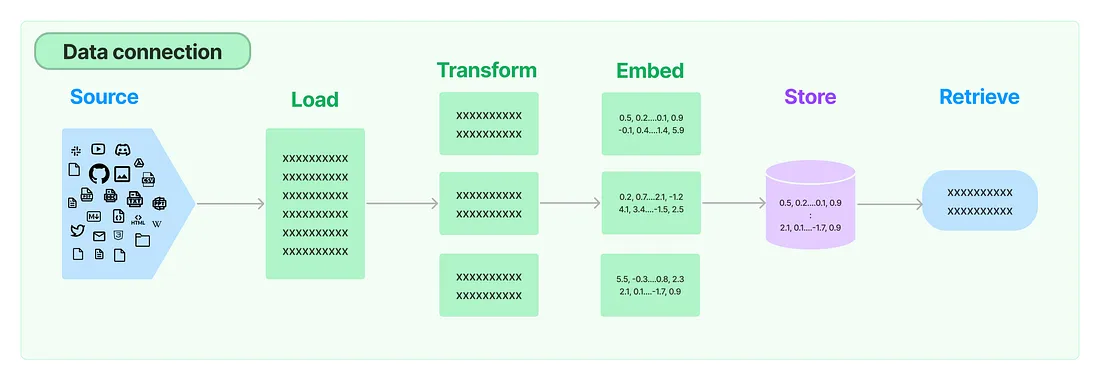

Document Loaders and Transformers
LangChain offers a wide array of document loaders that can fetch documents from various sources, including private S3 buckets and public websites. These documents can be of various types, such as HTML, PDF, or code. The Document Transformers component is responsible for preparing these documents for retrieval, including splitting large documents into smaller, more manageable chunks.



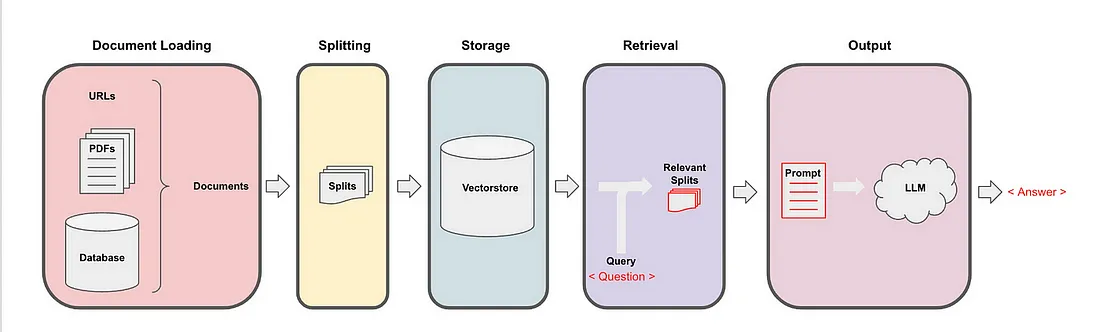

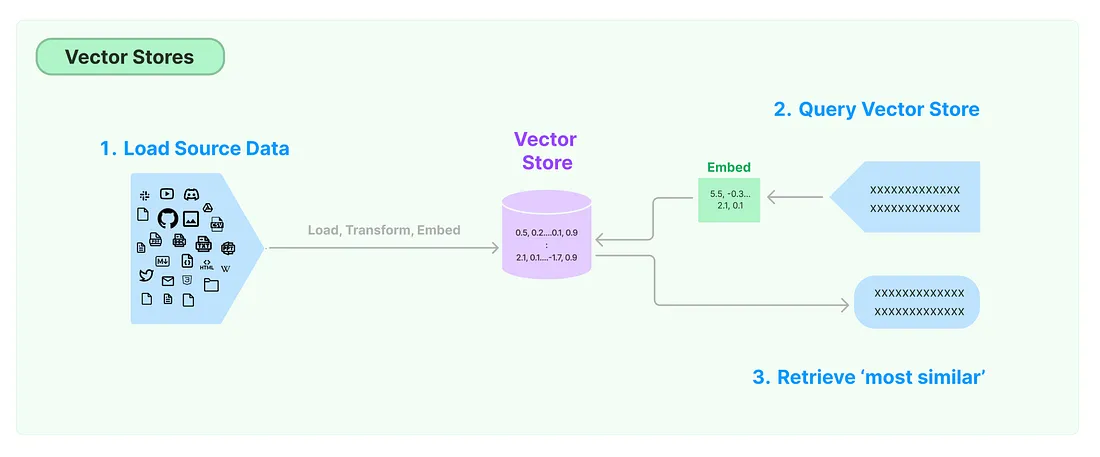

**Text Embedding Models**
Text embedding models in LangChain are designed to interface with various text embedding providers and methods, including OpenAI, Cohere, and Hugging Face. These models create vector representations of text, capturing its semantic meaning. This vectorization enables efficient retrieval of similar pieces of text.

**Vector Stores**
With the rise of embeddings, efficient databases are needed for storing and searching these embeddings. LangChain offers integrations with over 50 different vector stores, making it easy to choose the one that suits your needs best.


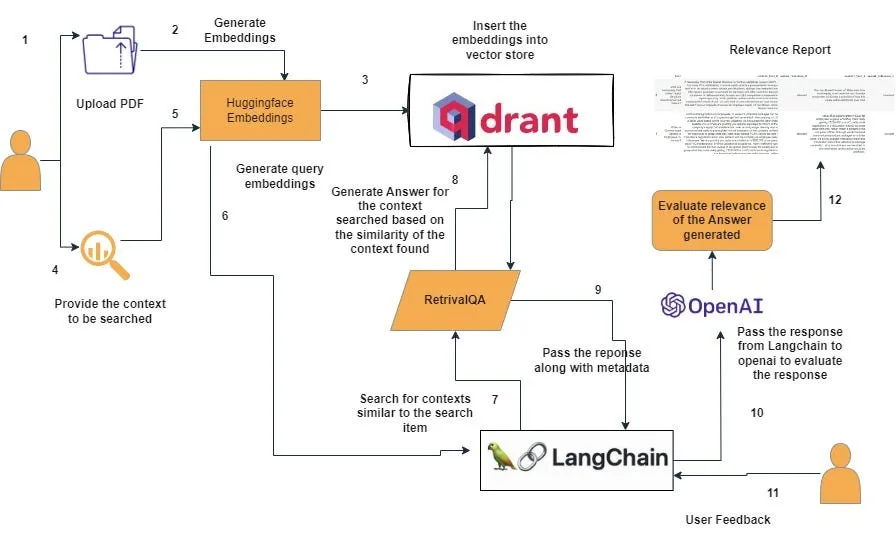


Retrievers
Retrievers in LangChain provide the interface to retrieve documents relevant to a query. These retrievers can use vector stores as their backbone but also support other types of retrievers. LangChain’s retrievers offer flexibility in customizing retrieval algorithms, ranging from simple semantic search to advanced methods that enhance performance.

Caching Embeddings
LangChain’s Caching Embeddings feature allows embeddings to be stored or temporarily cached, reducing the need for recomputation and improving overall performance.

Integration with Hugging Face
Hugging Face, a leading platform for transformer-based models, provides pre-trained models, including the ones used in RAG. LangChain seamlessly integrates with Hugging Face’s models, enabling you to fine-tune and adapt them for your specific tasks.


Conclusion
Retrieval-Augmented Generation (RAG) models represent a groundbreaking advancement in the field of large language model.
